In [49]:
import gpipsfs
import gpipsfs.tests.test_main as tm
import poppy
import astropy.units as u
%pylab inline

poppy.conf.default_image_display_fov = 2.8
matplotlib.rcParams['font.size']=8

Populating the interactive namespace from numpy and matplotlib


By default the GPI model just has the coronagraphic planes included. We can see what those are if we dig under the hood to extract the ``OpticalSystem`` instance from inside the ``Instrument`` class. 

In [50]:
gpi = gpipsfs.GPI()
osys = gpi._getOpticalSystem()
osys.planes

We need to add another plane with a sine wave. We can do that pretty easily, as follows.

# Initial Demo - how to add a sine wave

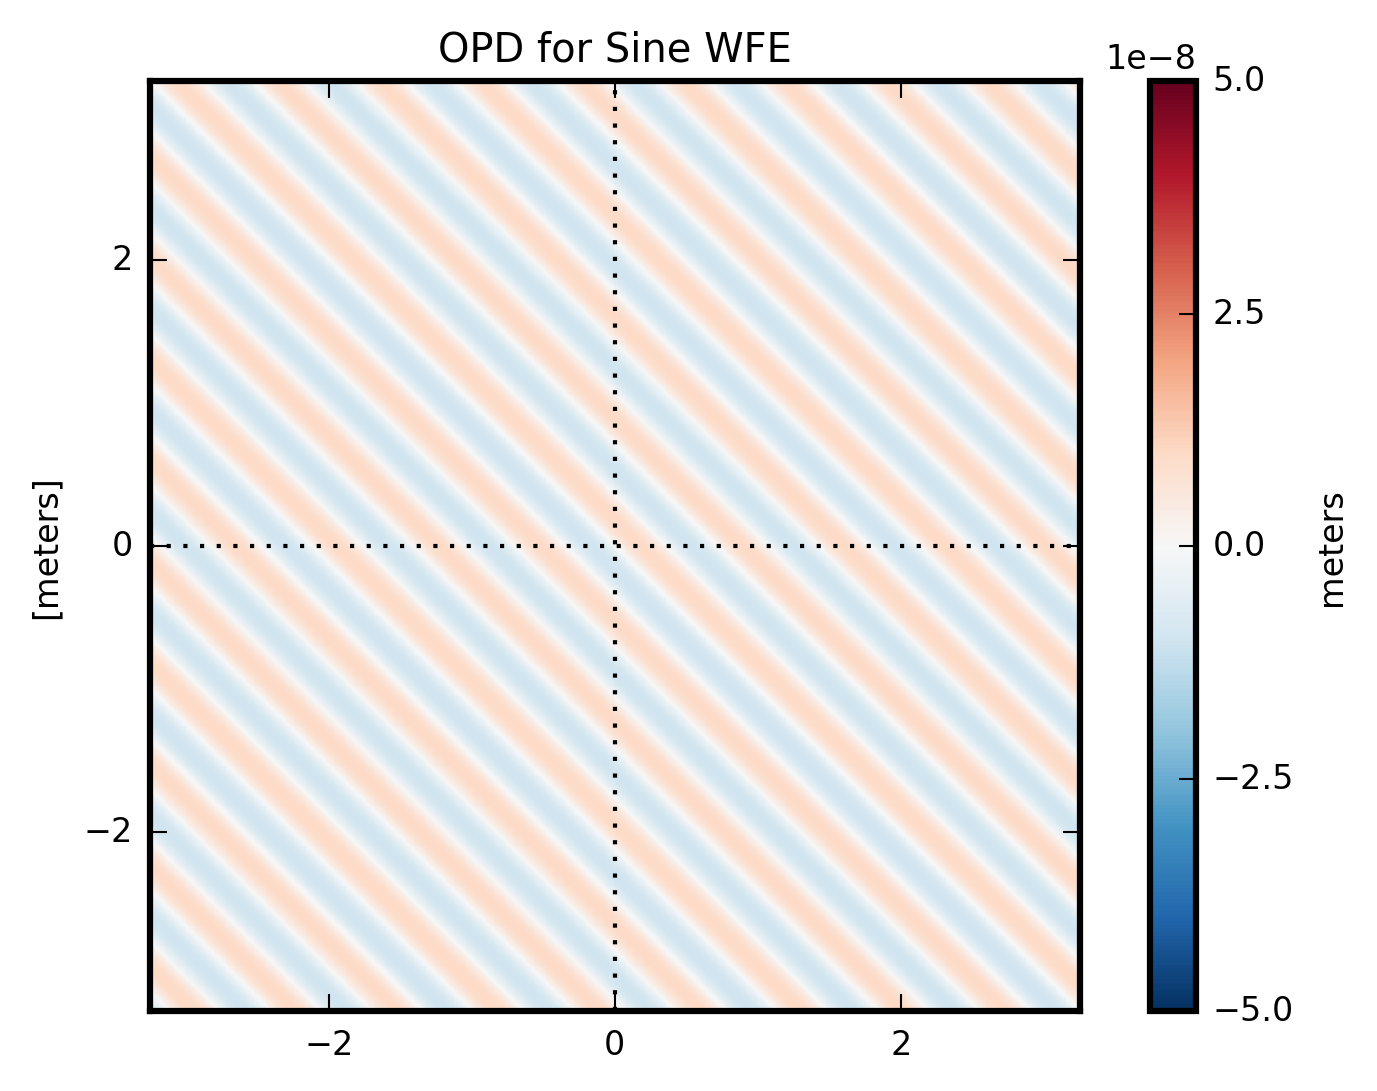

In [51]:
sinewfe = poppy.SineWaveWFE(spatialfreq=2/u.m, amplitude=10*u.nm, rotation=45)
sinewfe.display(what='opd', opd_vmax=50*u.nm, colorbar_orientation='vertical')

In [52]:
# minor display tweak
# let's annotate that sine wave object with some information about what a good display range is. 
# This is used below inside the call to calc_psf to make the intermediate planes display better. 
sinewfe.wavefront_display_vmax_hint = 0.01 # waves
sinewfe.wavefront_display_vmin_hint = - sinewfe.wavefront_display_vmax_hint

In [53]:
# Now we can add that sine wave instance to the optical planes.  THis is done by calling the 
# add_pupil function, which inserts it into the list and ensures that it's marked as the correct type of plane.
osys.add_pupil(sinewfe, index=1)

Let's display the modified optical system. 

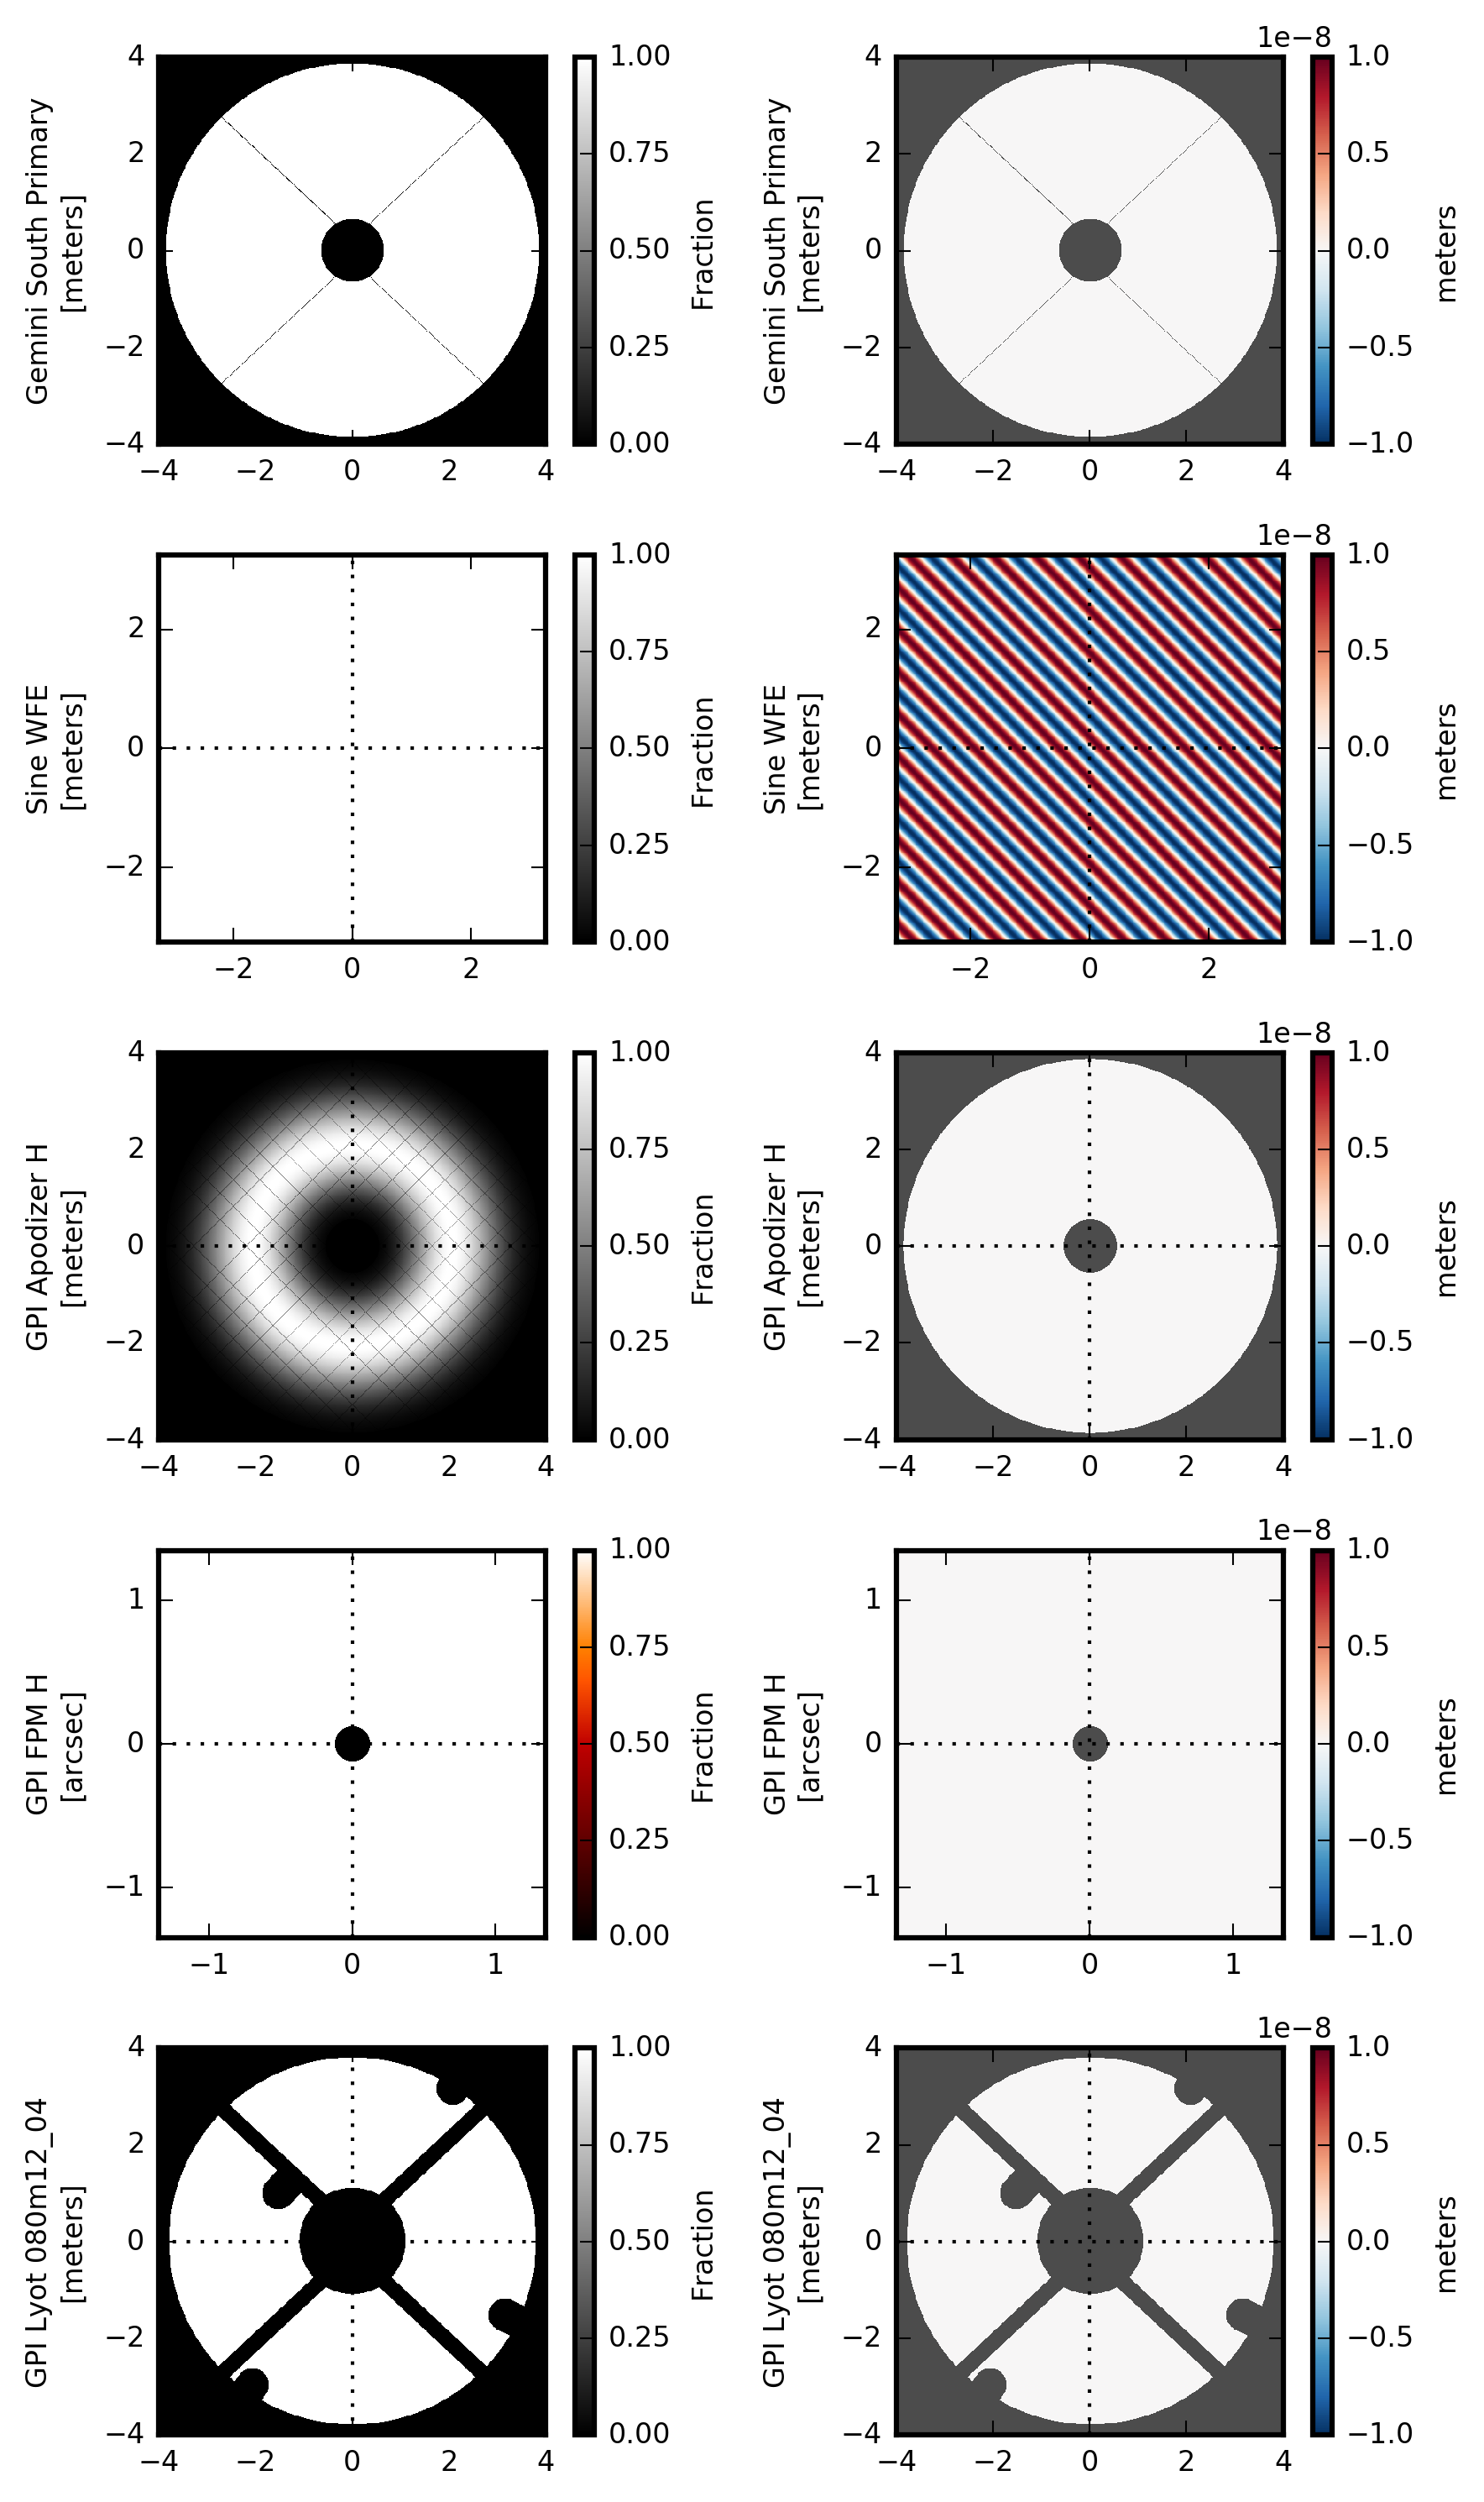

In [54]:
plt.figure(figsize=(6,10))
osys.display(what='both', opd_vmax=10*u.nm)
plt.tight_layout()

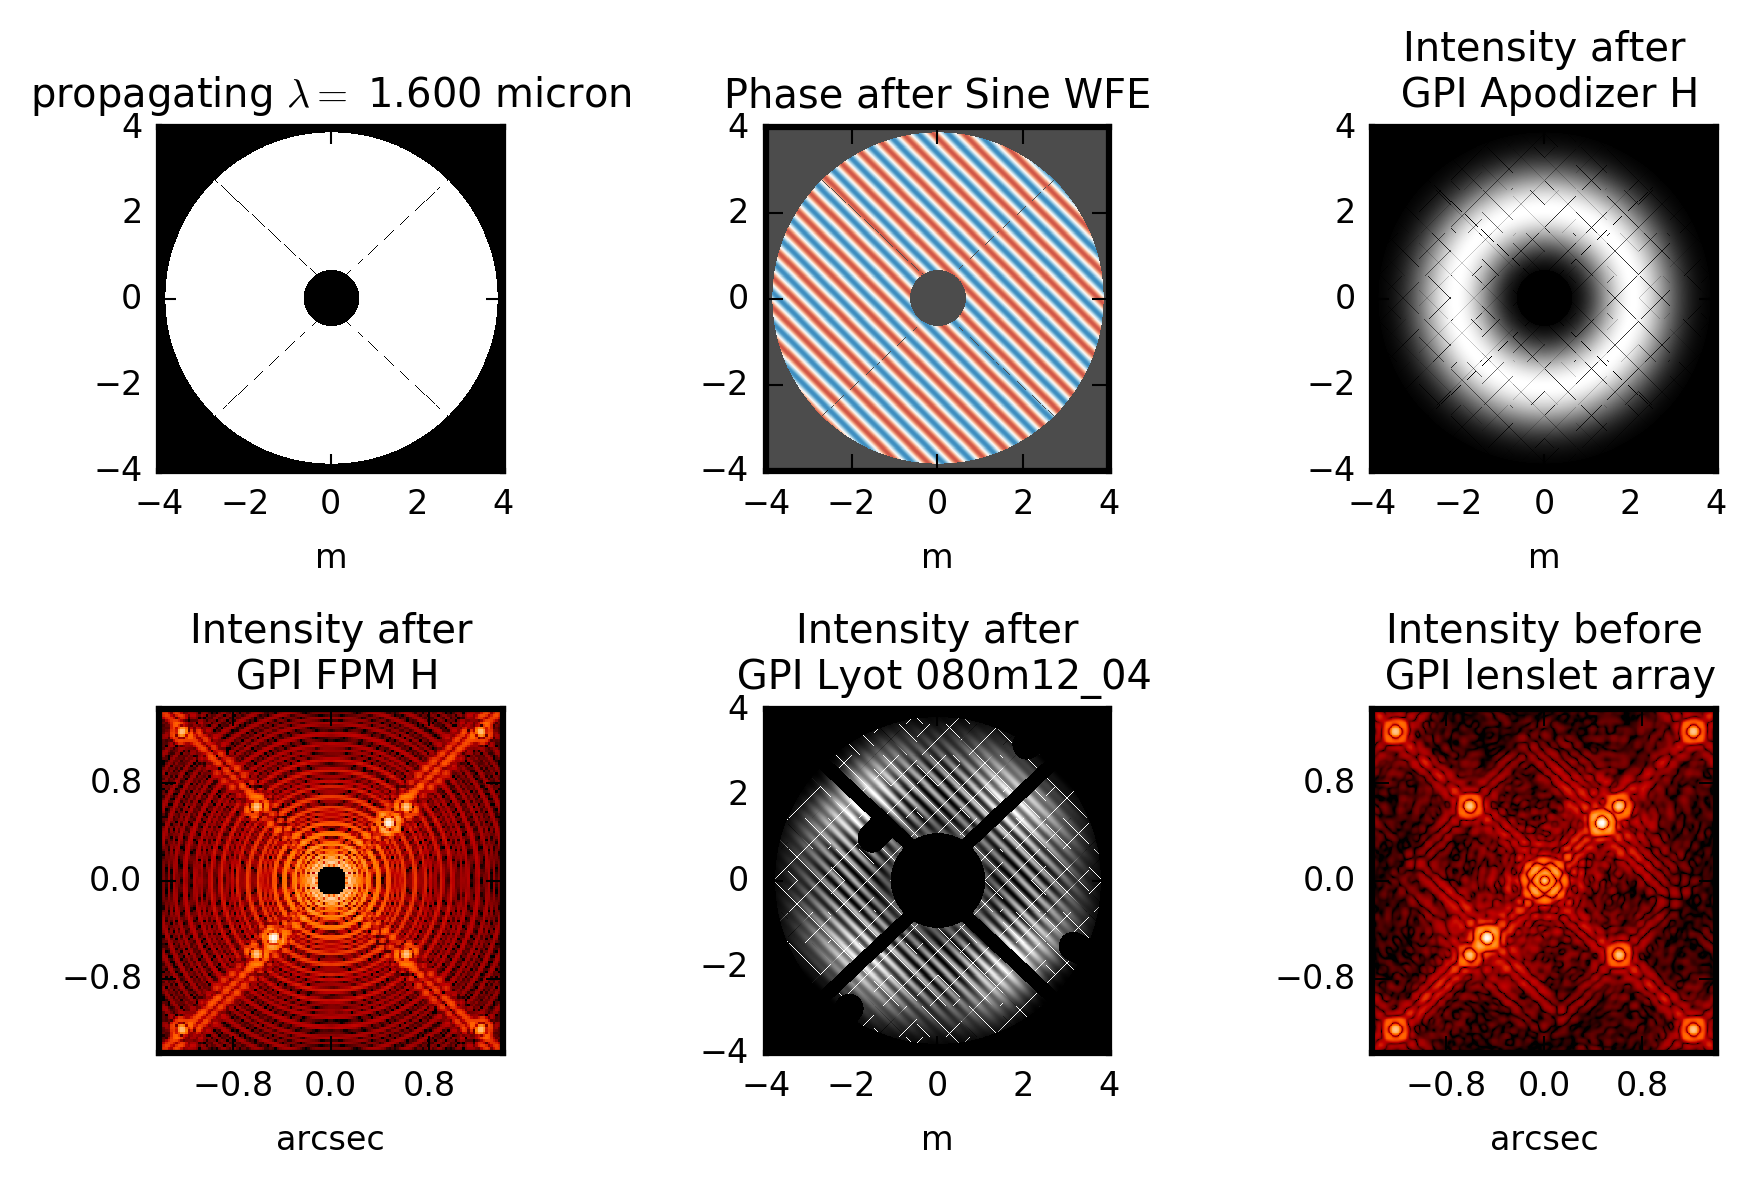

In [6]:
outpsf = osys.calc_psf(1.6e-6, display_intermediates=True)
plt.tight_layout()

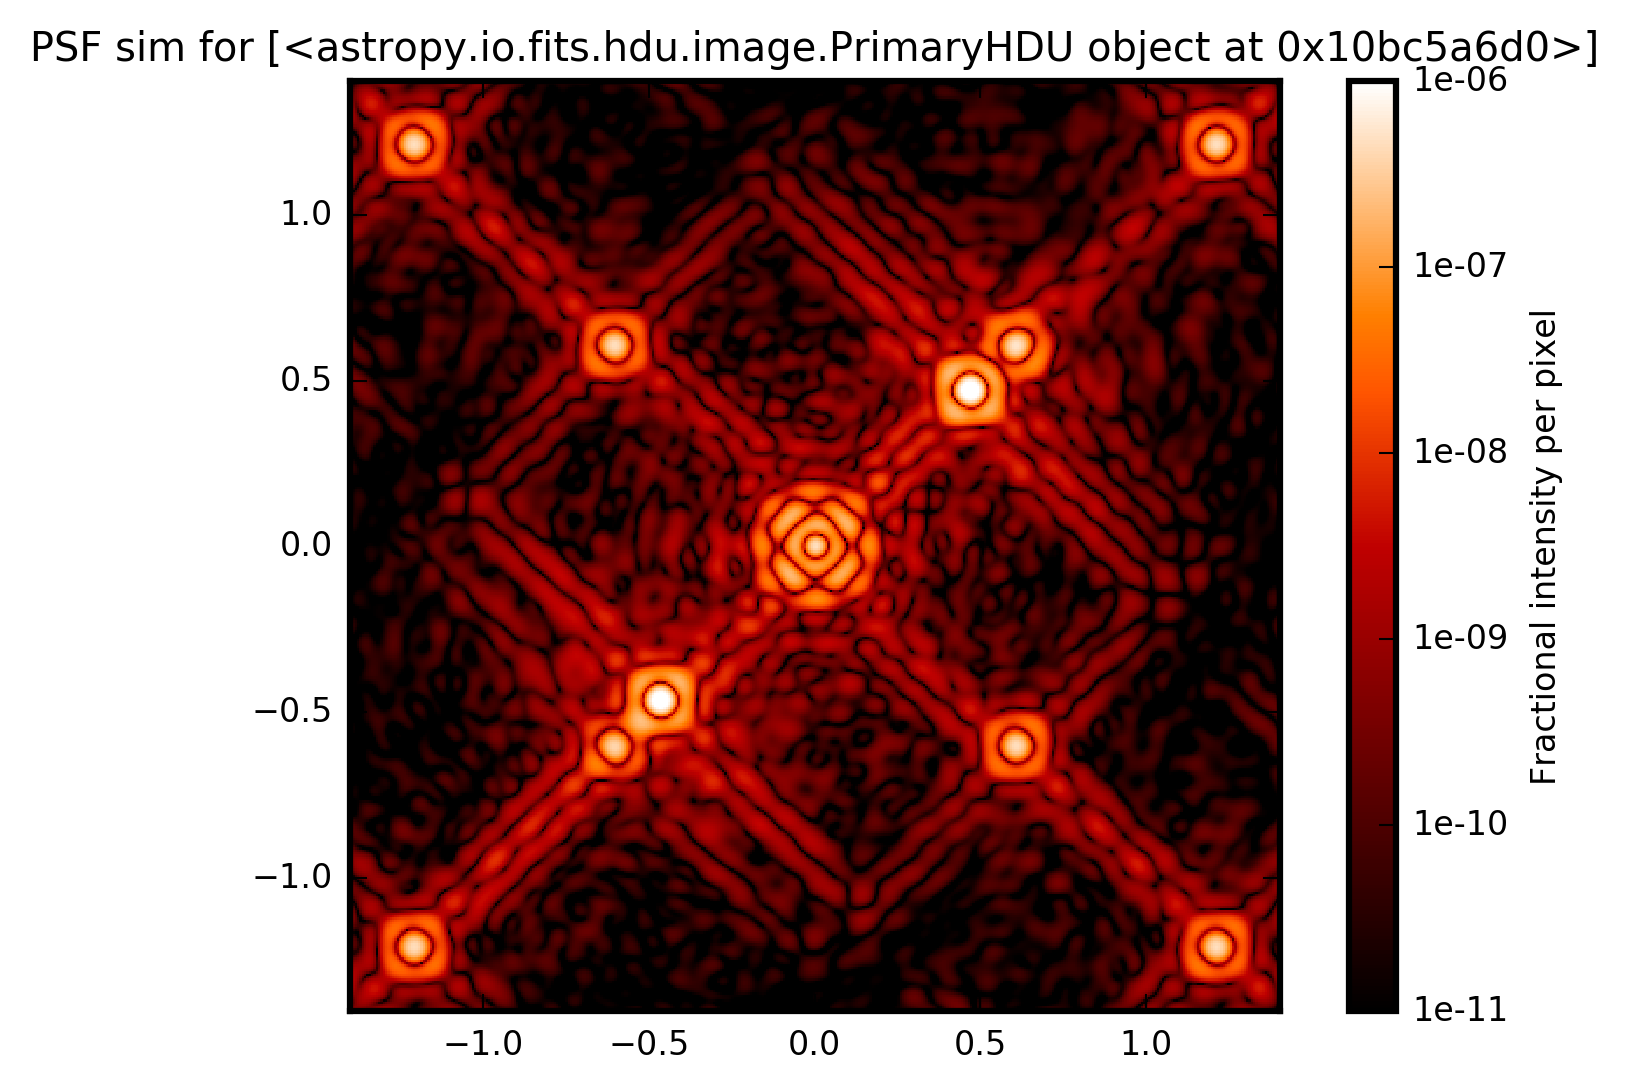

In [14]:
poppy.display_psf(outpsf, vmax=1e-6, vmin=1e-11)

In [8]:
osys.planes[-1].fov_arcsec

<Quantity 2.8059 arcsec>

# Sine right at sat spot spatial freq 

In [16]:
apod = osys.planes[2]

In [22]:
apod._apod_params[2]*1e-6*apod.magnification

0.38597369773817686

In [26]:
satfreq = 1./(apod._apod_params[2]*1e-6*apod.magnification)
satfreq

2.5908501171454033

In [34]:
sineamp = 2*u.nm

sinewfe = poppy.SineWaveWFE(spatialfreq=satfreq/u.m, amplitude=sineamp, rotation=45)
sinewfe.wavefront_display_vmax_hint = 0.001 # waves
sinewfe.wavefront_display_vmin_hint = - sinewfe.wavefront_display_vmax_hint

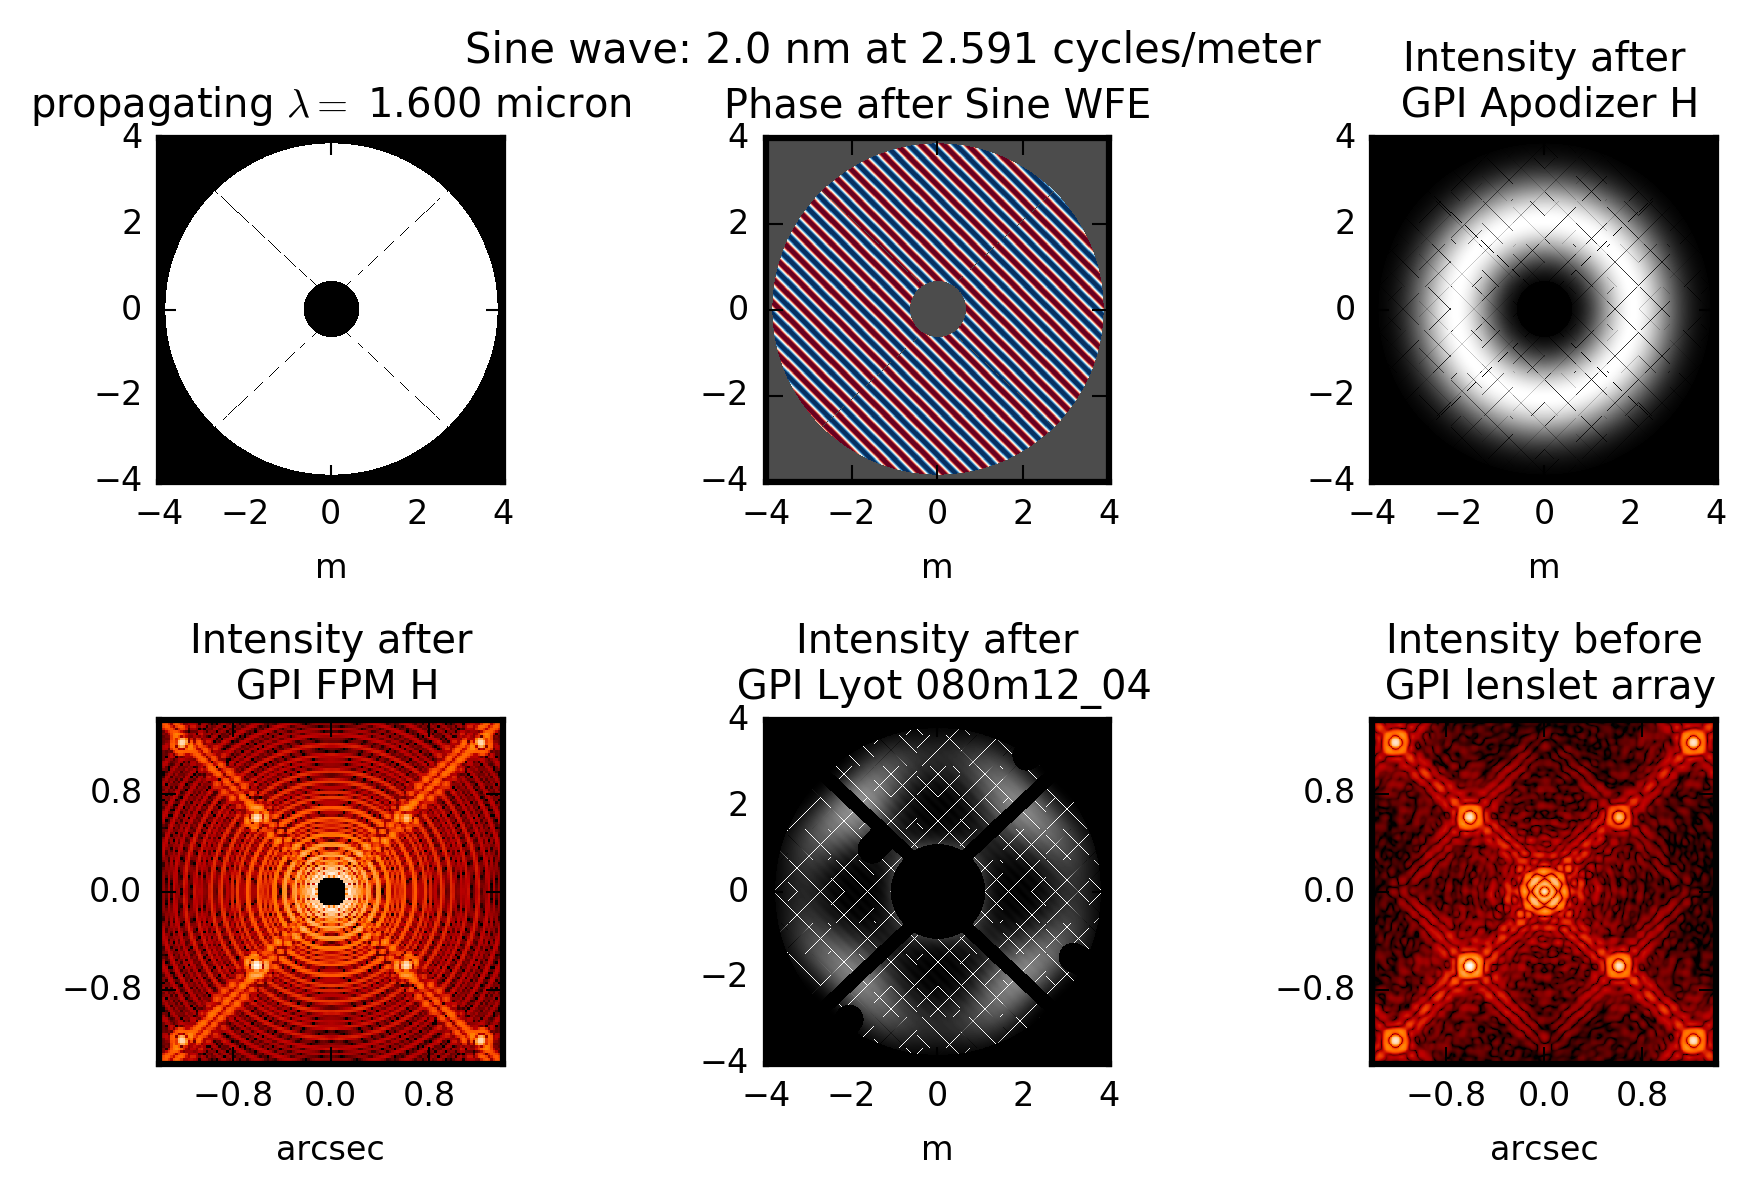

In [40]:
gpi = gpipsfs.GPI()
osys = gpi._getOpticalSystem()
osys.add_pupil(sinewfe, index=1)
outpsf = osys.calc_psf(1.6e-6, display_intermediates=True)
plt.suptitle("Sine wave: {} at {:.3f} cycles/meter".format(sineamp,satfreq),fontsize=10)
plt.tight_layout()



In [30]:
outpsf.writeto('out_sat.fits')

In [31]:
6e-5/9.6e-6

6.25

In [33]:
9.2/1.4

6.571428571428571